## Portfólios Hierárquicos

In [107]:
%load_ext autoreload
%autoreload 2  

import numpy as np
import pandas as pd
import yfinance as yf
import functions as f
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import funcoes as f
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
stock_prices = pd.read_csv('precos.csv', sep=';', index_col='Date')['2017':'2020']
benchmark = stock_prices['BOVA11.SA']
stocks = [
    'ABEV3.SA', 'PETR4.SA', 'AMER3.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC4.SA', 
    'BRKM5.SA', 'CIEL3.SA', 'CMIG4.SA', 'CPLE6.SA', 'ELET3.SA', 'EMBR3.SA',
    'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 
    'LREN3.SA', 'SANB11.SA', 'SUZB3.SA', 'TAEE11.SA', 'TIMS3.SA', 'TRPL4.SA', 
    'USIM5.SA', 'VALE3.SA', 'VIIA3.SA', 'VIVT3.SA', 'WEGE3.SA', 'MGLU3.SA'
    ]
stock_prices = stock_prices[stocks]
rets = f.returns(stock_prices.dropna(axis='columns'))
rets.tail()

,ABEV3.SA,PETR4.SA,AMER3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BRKM5.SA,CIEL3.SA,CMIG4.SA,CPLE6.SA,...,SUZB3.SA,TAEE11.SA,TIMS3.SA,TRPL4.SA,USIM5.SA,VALE3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,MGLU3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-01,-0.070045,-0.022239,0.253319,0.064628,-0.060544,-0.039616,-0.170975,0.070442,0.043847,0.060020,...,-0.051842,0.010065,0.006547,0.024793,-0.096008,-0.085124,0.001295,0.034721,-0.049891,0.100865
2019-09-01,0.028312,0.088882,0.028723,-0.026116,-0.006862,0.030010,0.152374,0.032258,-0.029133,-0.047793,...,0.157153,0.051172,-0.019608,0.019126,-0.011392,0.047839,0.024580,-0.027192,0.076889,0.020667
2019-10-01,-0.097143,0.103086,0.050672,0.116878,0.063637,0.037455,-0.148216,-0.051401,-0.047453,0.122153,...,-0.030015,-0.003472,-0.041142,-0.045749,-0.070422,-0.011518,-0.063131,-0.004919,0.054181,0.205184
2019-11-01,0.038550,-0.040803,0.109055,-0.013642,-0.007061,-0.021467,0.038933,0.031746,-0.043956,0.136159,...,0.181373,-0.015331,0.202154,-0.060670,0.172176,0.058898,0.187332,0.040449,0.192941,0.010674
2019-12-01,0.034349,0.042212,0.115726,-0.099539,0.113554,0.084498,0.066452,0.075327,0.056705,0.092016,...,0.029046,0.120559,0.157311,0.055181,0.117509,0.066427,0.267877,0.059179,0.139382,0.059294


### Portfólio de Paridade de Risco Hierárquico (HRP)

https://deliverypdf.ssrn.com/delivery.php?ID=484029088111000006078110091003117072016089038039060053007118000027101105086071094109010114056102019017037123126025070095007123048032033082076097115109125093116068038017009092066120087080119116077081119006082127097091096021004080012086005066078070&EXT=pdf&INDEX=TRUE


Em 2015, o professor Marcos López de Prado publicou o artigo BUILDING DIVERSIFIED PORTFOLIOS THAT OUTPERFORM OUT-OF-SAMPLE, onde expõe a idéia de um portfólio de Paridade de Risco utilizando agrupamento hierarquicos para definir a alocação de ativos. 

O método HRP pode ser dividido em três etapas:
- Agrupamento Hierárquico
- Organização de Matriz
- Bisseção Recursiva

**Agrupamento Hierárquico**  
Essa etapa divide o os ativos do portfólio em diferentes agrupamentos hierárquicos usando o algoritmo de Agrupamento de Árvore Hierárquica.  
Esse agrupamento é realizado de forma aglomerativa, ou seja do menor grupo até um grupo que abrange toda a carteira.  
<img src="https://quantdare.com/wp-content/uploads/2016/06/AggloDivHierarClustering-800x389.png" alt="drawing" width="600"/>

**Organização de Matriz**  
A matriz de covariancia é organizaada usando a ordem dos agrupamentos criados na etapa anterior, mostrando as colunas e linhas da matrix de covariancia de forma que as maiores covariancias são colocadas diagonalmente e os  elementos menores ao redor dessa diagonal e, uma vez que os elementos fora da diagonal não são completamente zero, isso é chamado de *matriz de covariância pseudo-diagonal*."  
<img src="https://hudsonthames.org/wp-content/uploads/2020/01/Screen-Shot-2020-01-05-at-9.20.16-PM-1.png" alt="drawing" width="300"/>

**Bisseção Recursiva**  
Nessa etapa, os pesos são definidos para os ativos, através da inversão da volatilidade, semelhante ao portfólio ERC mas o risco devido aquele agrupamento é alocado nos ativos.  
A operação então desse um nível na árvore com o percentual do risco restante, até que todos os pesos sejam atribuídos aos ativos do portfólio.  
Os pesos são atribuídos de cima para baixo baseado na variancia do subagrupamento. a principal vantagem dessa forma é que somente os ativos do mesmo grupo competem pela alocação em vez de competir com todos os ativos do portfólio.


### Plots da biblioteca RiskFolio

In [109]:
import riskfolio as rp

In [110]:

linkage = 'single' # Método de linkagem usada para construir os agrupamento
codependence = 'pearson' # Métrica construir a Matrix dentro do agrupamento
leaf_order = False # Consider optimal order of leafs in dendrogram
rm = 'MV' # Métrica de risco, Média Variancia
rf = 0 # Risk free rate


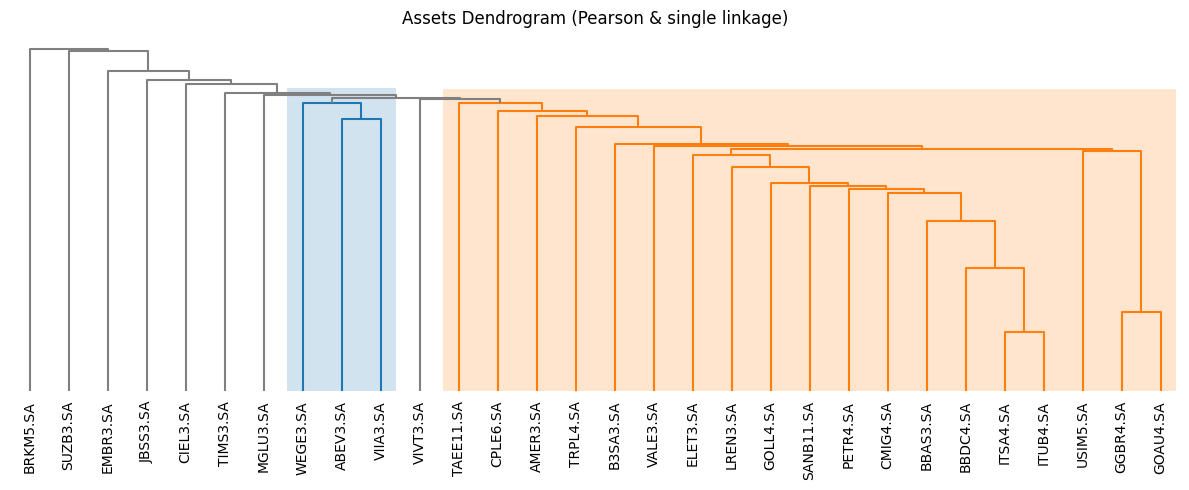

In [111]:
ax = rp.plot_dendrogram(returns=rets,
                        codependence=codependence,
                        linkage=linkage,
                        k=10,
                        leaf_order=False,
                        ax=None)

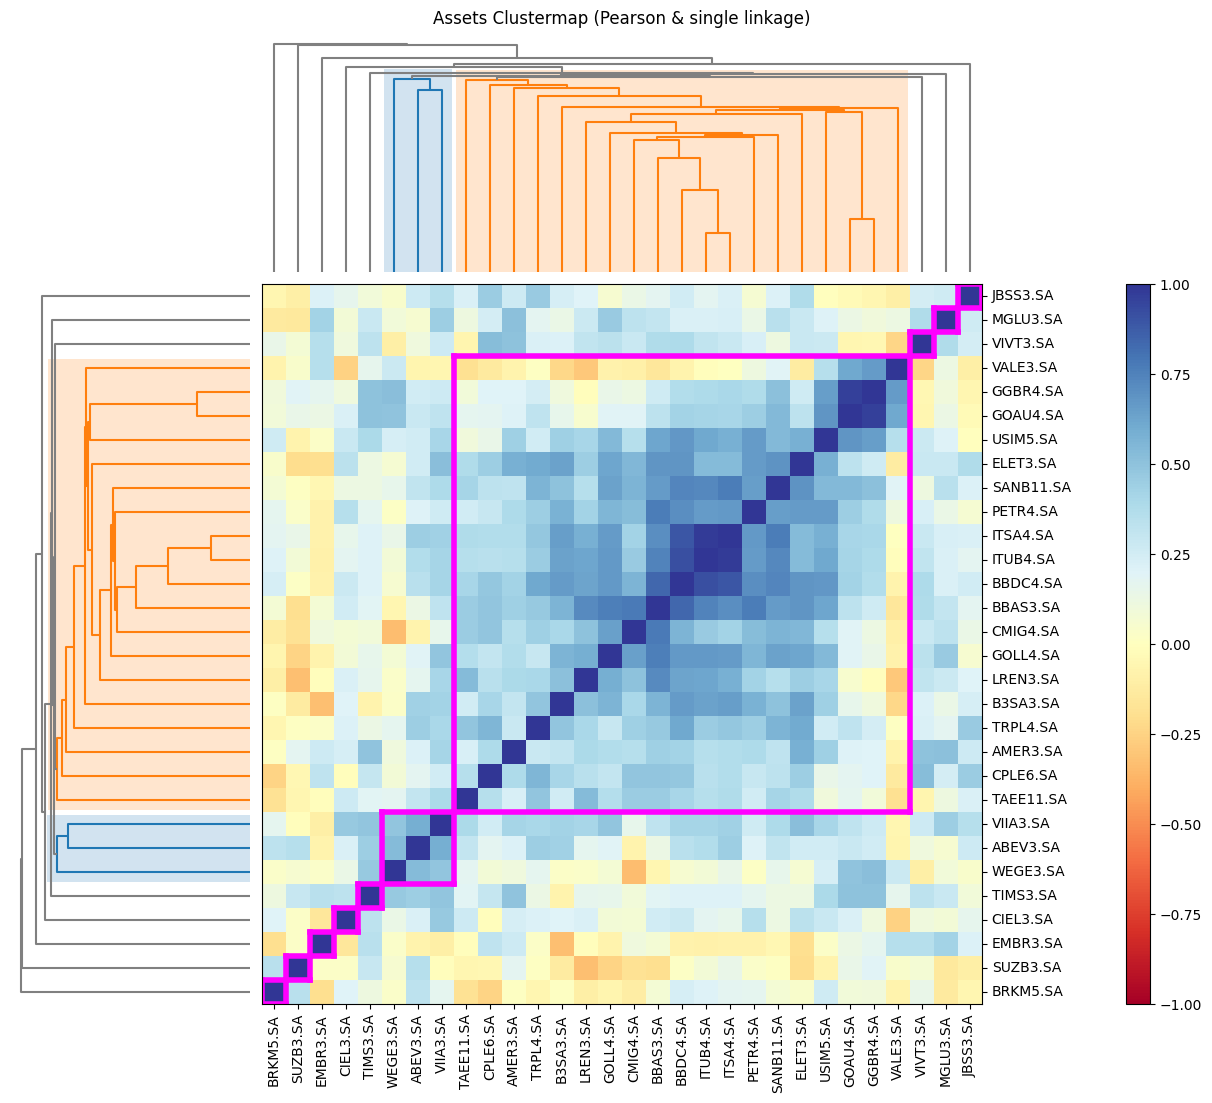

In [112]:
ax = rp.plot_clusters(returns=rets,
                      codependence=codependence,
                      linkage=linkage,
                      k=10,
                      leaf_order=True,
                      dendrogram=True,
                      ax=None)

### Função HRP

#### - Funções para Agrupamento Hierárquico

Funções: distancia_corr, matriz_plot e ligação (linkage)

distancia_corr:

$$ d_{i,j} = \sqrt{\frac{1}{2}(1- \rho_{i,j})}$$

```python
def distancia_corr(corr):
    dist = ((1-corr) / 2.0) ** 0.5 ## matriz de distancia
    return dist
```

In [113]:
def distancia_corr(corr: np.ndarray) -> np.ndarray:
    dist = ((1-corr) / 2.0) ** 0.5 ## matriz de distancia
    return dist

In [114]:
def matriz_plot(matriz: np.ndarray, ativos: list = None, tamanho: tuple = (5,4)) -> None:
    fig, ax = plt.subplots(figsize=tamanho)
    if ativos is None:
        ativos = []
    ax = sns.heatmap(matriz, ax=ax)
    ax.set_yticks(np.arange(0.5, matriz.shape[0] + 0.5), list(ativos))
    ax.set_xticks(np.arange(0.5, matriz.shape[0] + 0.5), list(ativos))
    plt.show()

##### Linkage
Para fazer a linkage usarei o algoritmo da cluster.hierarchy da biblioteca scipy.  
Essa função recebe a matriz de distancia e o método de linkage, é utilizado o Algoritmo do Ponto Mais Próximo (single), outras opções existem como o Algoritmo Ward de Minimização da Variância (ward), entre outros.  

Qualquer método pode ser utilizados (testes podem ser feitos para encontrar o algoritmo ótimo).  
Vou seguir o paper, usando o método 'single' e testar o método 'ward'.

In [115]:
## linkage
import scipy.cluster.hierarchy as sch

# link = sch.linkage(D, 'single')

#### - Funções para Ordenar de Matriz

In [116]:
# Função: pseudo_diag

def ordena_pseudo_diag(link: np.ndarray) -> list:
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]]) # seleciona os 2 primeiros valores do ultimo array
    numItems = link[-1, 3]    # numero de itens 
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)    # cria espaço
        df0 = sortIx[sortIx >= numItems]    #  encontra cluster
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]    # item 1
        df0 = pd.Series(link[j, 1], index=i+1)
        sortIx = sortIx.append(df0)    # item seguinte
        sortIx = sortIx.sort_index()    # reorganiza
        sortIx.index = range(sortIx.shape[0])    # reindexa
    lst =  sortIx.tolist()
    return lst

#### - Funções para Identificar a Variâcia Inversa, a Variâcia do Cluster, Bisseção Recursiva (alocação dos pesos)

In [117]:
# Função: bi_rec

def bisseção_recursiva(cov: np.ndarray, sortIx: list) -> pd.Series:
    
    def matriz_variancia_invertida(cov: np.ndarray, **kargs) -> np.ndarray:
        ivp = 1.0 / np.diag(cov)
        ivp /= ivp.sum()
        return ivp
    
    def variancia_cluster(cov: np.ndarray, cItems: np.ndarray) -> float:
        cov_ = cov.loc[cItems, cItems]    # matrix slice
        w_ = matriz_variancia_invertida(cov_).reshape(-1, 1)
        cVar = np.dot(np.dot(w_.T, cov_), w_)[0, 0]
        return cVar
    
    w = pd.Series([1] * len(sortIx), index=sortIx)
    cItems = [sortIx]    # inicializa todos os ativo em um cluster
    while len(cItems) > 0:
        cItems = [i[int(j): int(k)] for i in cItems
                  for j, k in ((0, len(i) / 2), (len(i) / 2, len(i))) if len(i) > 1]    # bisseção
        for i in range(0, len(cItems), 2):    # analisa pares
            cItems0 = cItems[i]    # cluster 1
            cItems1 = cItems[i+1]    # cluster seguinte
            cVar0 = variancia_cluster(cov, cItems0)
            cVar1 = variancia_cluster(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha    # weight 1
            w[cItems1] *= 1 - alpha    # weight 2
    return w

- Uma função que Agrupa todas e retorna os pesos

In [118]:
# Função: weight_hrp
def weight_hrp(rets: pd.DataFrame, linkage: str = 'single' ) -> pd.Series:

    corr, cov = rets.corr(), rets.cov()
    dist = distancia_corr(corr)
    link = sch.linkage(dist, linkage)
    sortIx = ordena_pseudo_diag(link) # ordernar a matriz pseudo-diag 
    sortIx = corr.index[sortIx].tolist()    # recupera os nomes
    weights = bisseção_recursiva(cov, sortIx)
    return weights.sort_index()

hrp_weights = weight_hrp(rets)
hrp_weights

ABEV3.SA     0.051527
AMER3.SA     0.019010
B3SA3.SA     0.028146
BBAS3.SA     0.007607
BBDC4.SA     0.013725
BRKM5.SA     0.051549
CIEL3.SA     0.031878
CMIG4.SA     0.008747
CPLE6.SA     0.017837
ELET3.SA     0.004679
EMBR3.SA     0.077007
GGBR4.SA     0.036564
GOAU4.SA     0.034023
GOLL4.SA     0.003468
ITSA4.SA     0.013486
ITUB4.SA     0.016894
JBSS3.SA     0.022183
LREN3.SA     0.038688
MGLU3.SA     0.010982
PETR4.SA     0.013229
SANB11.SA    0.015660
SUZB3.SA     0.030420
TAEE11.SA    0.104578
TIMS3.SA     0.056109
TRPL4.SA     0.028287
USIM5.SA     0.010006
VALE3.SA     0.083814
VIIA3.SA     0.007207
VIVT3.SA     0.102314
WEGE3.SA     0.060373
dtype: float64

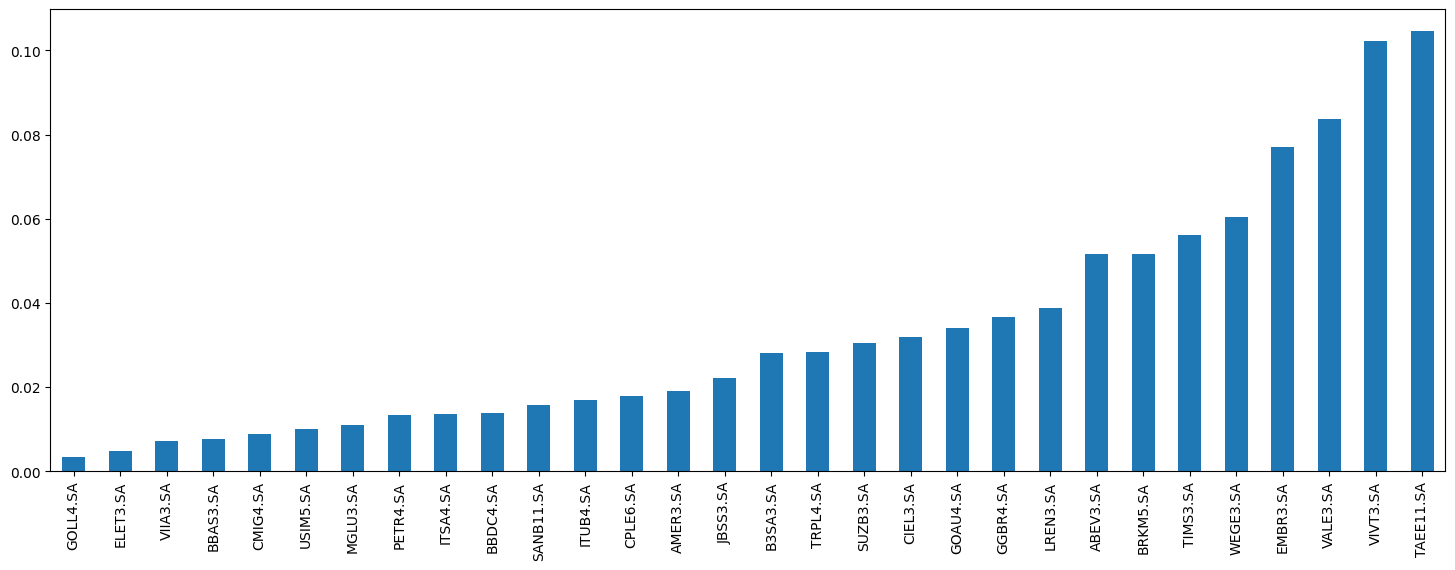

In [119]:
(hrp_weights).sort_values().plot.bar(figsize=(18,6));

In [120]:
hrp_ward_weights = weight_hrp(rets, 'ward')
hrp_ward_weights

ABEV3.SA     0.046824
AMER3.SA     0.013329
B3SA3.SA     0.024640
BBAS3.SA     0.008902
BBDC4.SA     0.025428
BRKM5.SA     0.052447
CIEL3.SA     0.018395
CMIG4.SA     0.009669
CPLE6.SA     0.038232
ELET3.SA     0.003765
EMBR3.SA     0.074222
GGBR4.SA     0.019374
GOAU4.SA     0.019745
GOLL4.SA     0.003102
ITSA4.SA     0.013853
ITUB4.SA     0.017354
JBSS3.SA     0.027451
LREN3.SA     0.030819
MGLU3.SA     0.006693
PETR4.SA     0.013628
SANB11.SA    0.027923
SUZB3.SA     0.029320
TAEE11.SA    0.144851
TIMS3.SA     0.047474
TRPL4.SA     0.095859
USIM5.SA     0.008948
VALE3.SA     0.033201
VIIA3.SA     0.006549
VIVT3.SA     0.071738
WEGE3.SA     0.066266
dtype: float64

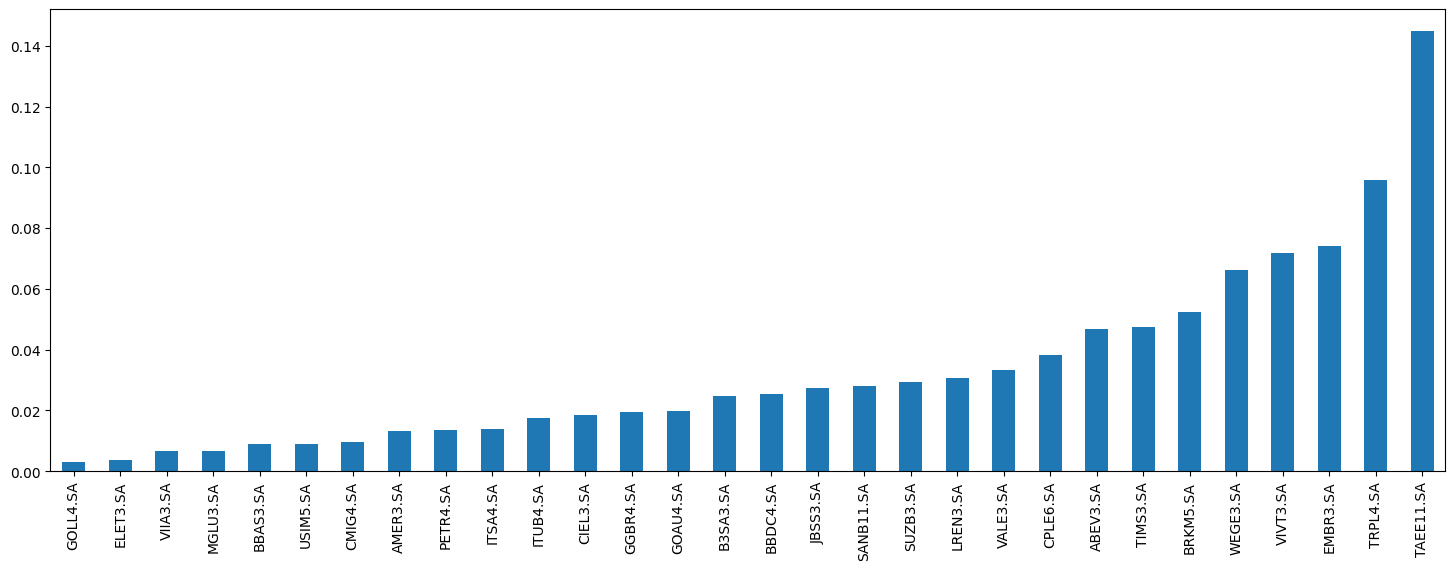

In [121]:
(hrp_ward_weights).sort_values().plot.bar(figsize=(18,6));

In [122]:
periodos = 60
oos = 1

stock_prices = pd.read_csv('precos.csv', sep=';', index_col='Date')
benchmark = stock_prices['BOVA11.SA']
stock_prices.drop('BOVA11.SA', axis=1, inplace=True)

bova = f.returns(benchmark);print('Benchmark Done')
rets_ew = f.pipeline(stock_prices, periodos, oos, algo=f.weight_ew);print('EW Done')

rfr = f.annualize_rets(
    f.get_taxa_juros(rets_ew.index.min(),rets_ew.index.max())
)[0]

rets_hrp = f.pipeline(stock_prices, periodos, oos, algo=weight_hrp);print('HRP Done')
rets_hrp_ward = f.pipeline(stock_prices, periodos, oos, algo=weight_hrp, linkage='ward');print('HRP Ward Done')
rets_hrp_complete = f.pipeline(stock_prices, periodos, oos, algo=weight_hrp, linkage='complete');print('HRP complete Done')

hrp_portfolios_results = pd.DataFrame(
    {
    "BOVA11": bova[rets_ew.index.min():],
     "EW": rets_ew['rets'], 
     "HRP Single": rets_hrp['rets'], 
     "HRP Ward": rets_hrp_ward['rets'], 
     "HRP complete": rets_hrp_complete['rets'], 
    }
)

hrp_portfolios_results.corr()

Benchmark Done
EW Done
HRP Done
HRP Ward Done
HRP complete Done


,BOVA11,EW,HRP Single,HRP Ward,HRP complete
BOVA11,1.000000,0.949759,0.703995,0.667088,0.666533
EW,0.949759,1.000000,0.732304,0.698471,0.693129
HRP Single,0.703995,0.732304,1.000000,0.972931,0.979763
HRP Ward,0.667088,0.698471,0.972931,1.000000,0.996383
HRP complete,0.666533,0.693129,0.979763,0.996383,1.000000


,Annualized Return,Annualized Vol,Sharpe Ratio,Adjusted Sharpe Ratio,Sortino Ratio,Average Drawdown,Max Drawdown,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%)
EW,18.39,24.21,0.37775,0.35249,0.65291,-6.43,-35.37,-0.74366,6.37206,10.69,13.76
HRP Ward,12.07,21.67,0.15133,0.14685,0.27111,-6.34,-29.80,-0.98034,8.08812,10.06,15.40
HRP complete,11.86,21.45,0.14402,0.13985,0.26146,-6.66,-29.45,-1.02923,7.94224,10.06,15.32
HRP Single,10.50,20.69,0.08832,0.08631,0.19006,-7.26,-29.70,-1.42793,8.38403,10.29,15.40
BOVA11,10.06,23.81,0.05930,0.05876,0.22390,-7.87,-37.65,-0.85778,6.79857,11.25,14.75


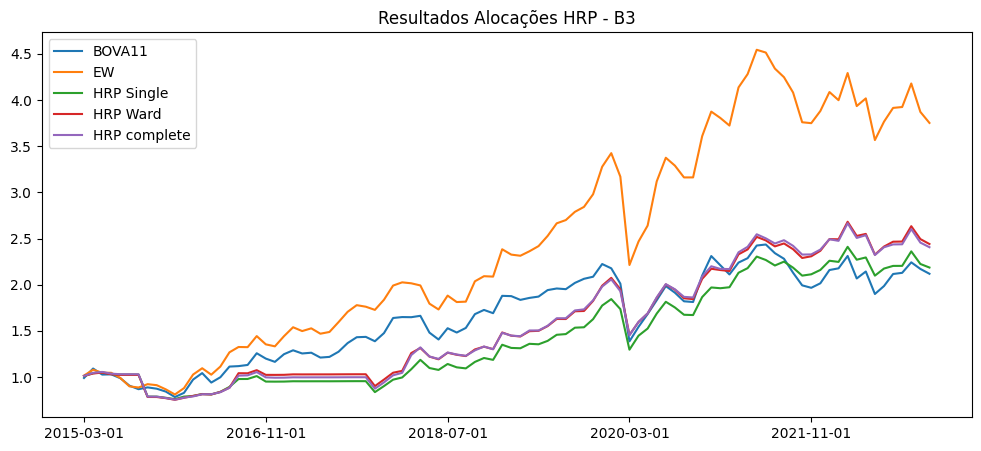

In [123]:
(1+hrp_portfolios_results).cumprod().plot(figsize=(12,5), title="Resultados Alocações HRP - B3");
f.summary_stats(hrp_portfolios_results,rfr).sort_values('Sharpe Ratio', ascending=False)

## Portfólio de Alocação de Ativos baseado em Clusters Hierárquicos (HCAA)

In [124]:
import numpy as np
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import linkage


# Auxiliary function to get the node_id and the capital allocation for each cluster
def get_levels(n_clusters: int, n_filas: int, mat_Z: np.matrix):
    nodos_id = []
    nivel_nodo = []
    filas_Z = mat_Z.shape[0]
    current_bif = mat_Z[-1]
    nodos_id.append(int(current_bif[0]))
    nivel_nodo.append(.5)
    nodos_id.append(int(current_bif[1]))
    nivel_nodo.append(.5)
    current_level = 2
    while(current_level < n_clusters):
        id_cluster = filas_Z+n_filas-current_level
        current_bif = mat_Z[-current_level]
        index_of_id = nodos_id.index(id_cluster)
        new_weight = nivel_nodo[index_of_id] / 2
        del nivel_nodo[index_of_id]
        del nodos_id[index_of_id]
        nodos_id.append(int(current_bif[0]))
        nivel_nodo.append(new_weight)
        nodos_id.append(int(current_bif[1]))
        nivel_nodo.append(new_weight)
        current_level += 1
    return(nodos_id, nivel_nodo)

# Auxiliary function to get the assets id's of each cluster 
def get_leaves(id_nodo, mat_Z, n_filas):
    if id_nodo <= n_filas -1:
        return [id_nodo]
    fila_Z = mat_Z[id_nodo - n_filas]
    id_nodo_1 = int(fila_Z[0])
    id_nodo_2 = int(fila_Z[1])
    el_1 =0
    el_2 = 0
    if (id_nodo_1 <= n_filas-1) and(id_nodo_2 <= n_filas-1):
        return([id_nodo_1, id_nodo_2])
    elif (id_nodo_1 > n_filas-1)and(id_nodo_2 > n_filas-1):
        el_1 = get_leaves(id_nodo_1, mat_Z, n_filas)
        el_2 = get_leaves(id_nodo_2, mat_Z, n_filas)
        return(el_1 + el_2)
    elif (id_nodo_1 > n_filas-1):
        el_1 = get_leaves(id_nodo_1, mat_Z, n_filas)
        el_1.append(id_nodo_2)
        return(el_1)
    else:
        el_2 = get_leaves(id_nodo_2, mat_Z, n_filas)
        el_2.append(id_nodo_1)
        return(el_2)

# function to the appropiate number of groups given a cutoff point
def get_groups(Z_mat: np.matrix, cutoff_point: float)->int:
    distances = Z_mat[:,2]
    number_groups = int(distances.shape[0] - (sum(distances <= cutoff_point)) +1)
    return number_groups


# function to get the weight of the cluster.
def weight_hcaa(rets: pd.DataFrame, n_clusters:int = 0, custom_corr =np.corrcoef ,inverse_data = True, cutoff_point: float = None, return_groups: bool = False)->tuple:
    # Convertir matriz de datos en matriz de distancias
    mat_X = distancia_corr(rets.corr())
    if not inverse_data:
        E_matrix = custom_corr(mat_X)
    else:    
        E_matrix = custom_corr(mat_X.T)
    D_matrix = np.sqrt(2*(1- E_matrix))
    D_matrix = np.around(D_matrix, decimals=7)
    D_condensed = ssd.squareform(D_matrix)
    Z = linkage(D_condensed, 'ward', optimal_ordering = True)
    if cutoff_point:
        n_clusters = get_groups(Z, cutoff_point)
    n_filas = mat_X.shape[1]
    levels = get_levels(n_clusters, n_filas, Z)
    index_asset = []
    weights = []
    index_assets_groups = []
    for index, node_id in enumerate(levels[0]):
        if node_id <= n_filas-1:
            index_asset.append(node_id)
            weights.append(levels[1][index])
            nomes = mat_X.index[index_asset].tolist()
        else:
            assets = get_leaves(node_id, Z, n_filas)
            cluster_weight = levels[1][index]
            asset_weight = round(cluster_weight/len(assets), 6)
            index_assets_groups.append(assets)
            index_asset += assets
            weights += [asset_weight] *len(assets)
            nomes = mat_X.index[index_asset].tolist()
    # if return_groups:
    #     return (index_asset, weights, index_assets_groups) 
    # return (index_asset, weights, nomes)
    return pd.Series(weights, index=nomes)

In [125]:
hcaa_weights = weight_hcaa(rets.corr(), 10)
hcaa_weights

CIEL3.SA     0.062500
VIIA3.SA     0.062500
AMER3.SA     0.041667
VIVT3.SA     0.041667
MGLU3.SA     0.041667
JBSS3.SA     0.031250
CPLE6.SA     0.031250
TRPL4.SA     0.031250
TAEE11.SA    0.031250
GOAU4.SA     0.041667
GGBR4.SA     0.041667
VALE3.SA     0.041667
WEGE3.SA     0.031250
TIMS3.SA     0.031250
EMBR3.SA     0.062500
ABEV3.SA     0.062500
BRKM5.SA     0.031250
SUZB3.SA     0.031250
BBAS3.SA     0.011364
GOLL4.SA     0.011364
CMIG4.SA     0.011364
LREN3.SA     0.011364
ELET3.SA     0.011364
B3SA3.SA     0.011364
ITSA4.SA     0.011364
ITUB4.SA     0.011364
BBDC4.SA     0.011364
PETR4.SA     0.011364
SANB11.SA    0.011364
USIM5.SA     0.125000
dtype: float64

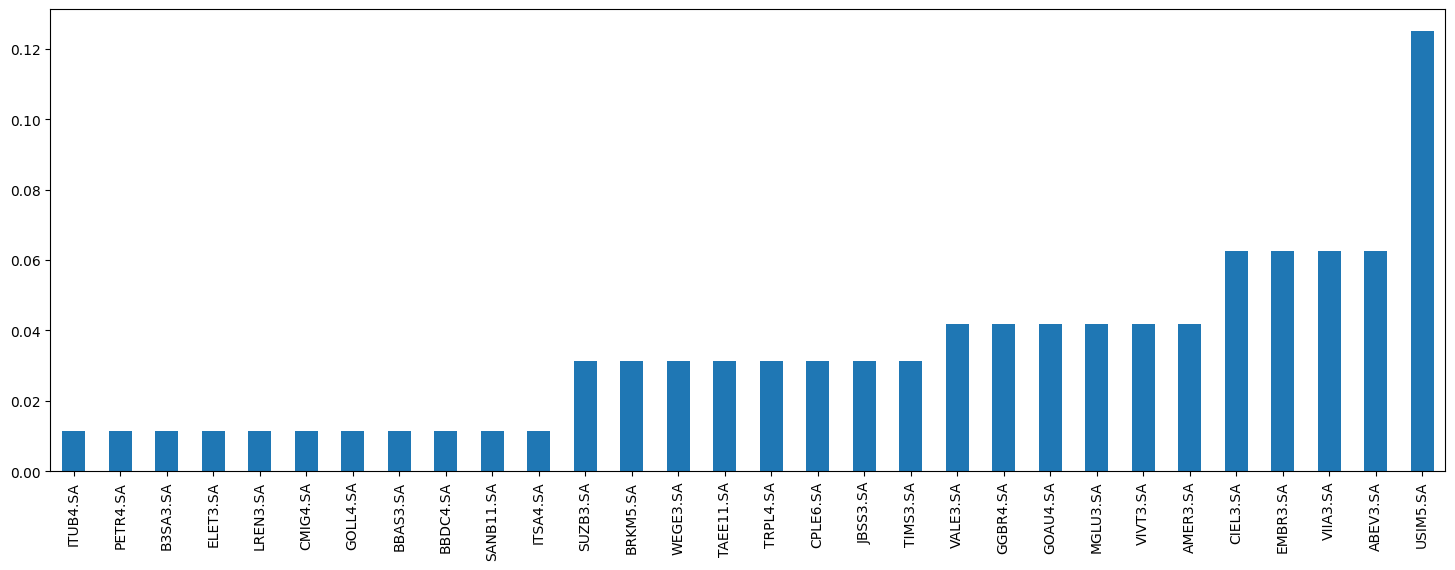

In [126]:
(hcaa_weights).sort_values().plot.bar(figsize=(18,6));

In [127]:
periodos = 60
oos = 1

rets_hcaa_n = f.pipeline(stock_prices, periodos, oos, algo=weight_hcaa);print('HCAA_n Done')
rets_hcaa_5 = f.pipeline(stock_prices, periodos, oos, algo=weight_hcaa, n_clusters=5);print('HCAA_5 Done')
rets_hcaa_10= f.pipeline(stock_prices, periodos, oos, algo=weight_hcaa, n_clusters=10);print('HCAA_10 Done')

hcaa_portfolios_results = pd.DataFrame(
    {
    "BOVA11": bova[rets_ew.index.min():],
     "EW": rets_ew['rets'], 
     "HCAA_n": rets_hcaa_n['rets'], 
     "HCAA_5": rets_hcaa_5['rets'], 
     "HCAA_10": rets_hcaa_10['rets'], 
    }
)

hcaa_portfolios_results.corr()

HCAA_n Done
HCAA_5 Done
HCAA_10 Done


,BOVA11,EW,HCAA_n,HCAA_5,HCAA_10
BOVA11,1.000000,0.949759,0.923877,0.924008,0.925561
EW,0.949759,1.000000,0.985819,0.969294,0.961592
HCAA_n,0.923877,0.985819,1.000000,0.975894,0.968367
HCAA_5,0.924008,0.969294,0.975894,1.000000,0.994670
HCAA_10,0.925561,0.961592,0.968367,0.994670,1.000000


,Annualized Return,Annualized Vol,Sharpe Ratio,Adjusted Sharpe Ratio,Sortino Ratio,Average Drawdown,Max Drawdown,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%)
HCAA_10,20.15,23.50,0.45857,0.42665,0.75630,-6.84,-33.37,-0.63295,5.42335,10.16,13.63
HCAA_5,19.33,23.66,0.42329,0.39884,0.71283,-7.05,-33.19,-0.56107,5.43753,10.17,13.54
HCAA_n,18.68,23.40,0.40203,0.37411,0.66924,-6.47,-34.36,-0.64617,6.88359,10.04,13.46
EW,18.39,24.21,0.37775,0.35249,0.65291,-6.43,-35.37,-0.74366,6.37206,10.69,13.76
BOVA11,10.06,23.81,0.05930,0.05876,0.22390,-7.87,-37.65,-0.85778,6.79857,11.25,14.75


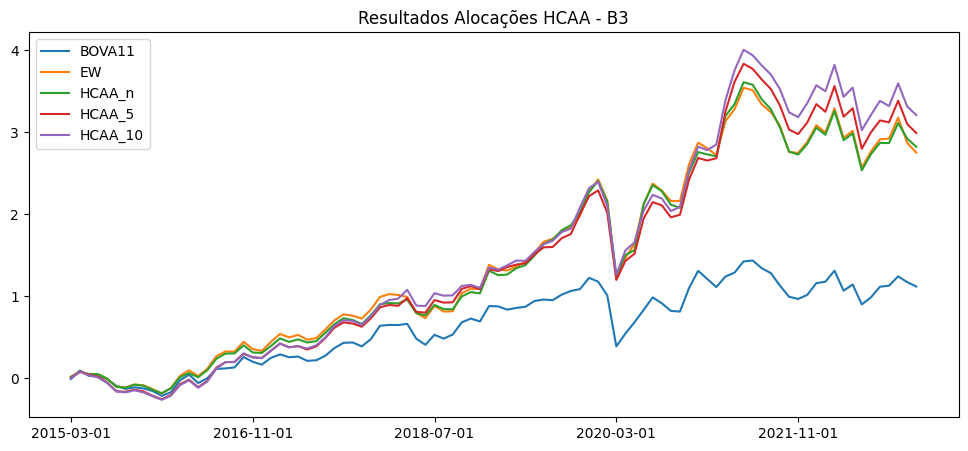

In [128]:
((1+hcaa_portfolios_results).cumprod()-1).plot(figsize=(12,5), title="Resultados Alocações HCAA - B3");
f.summary_stats(hcaa_portfolios_results, rfr).sort_values('Sharpe Ratio', ascending=False)

In [129]:
((1+hcaa_portfolios_results).cumprod()-1).tail()

,BOVA11,EW,HCAA_n,HCAA_5,HCAA_10
2022-08-01,1.116177,2.915189,2.872221,3.145885,3.384606
2022-09-01,1.128774,2.924963,2.869245,3.122826,3.321882
2022-10-01,1.242552,3.179790,3.113587,3.386966,3.598141
2022-11-01,1.171166,2.872015,2.924021,3.101586,3.315482
2022-12-01,1.118576,2.752606,2.823699,2.991628,3.211518


,Annualized Return,Annualized Vol,Sharpe Ratio,Adjusted Sharpe Ratio,Sortino Ratio,Average Drawdown,Max Drawdown,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%)
HCAA_n,27.80,18.37,0.97413,0.99429,1.91855,-3.86,-24.30,0.08554,2.82782,6.34,8.23
HCAA_10,28.18,20.19,0.90354,0.91389,1.67485,-5.25,-31.52,0.07732,3.00541,7.12,9.86
EW,27.84,20.23,0.88613,0.92510,1.87057,-4.22,-24.84,0.23044,2.69601,6.94,8.49
HCAA_5,27.38,20.09,0.87109,0.88435,1.64335,-5.13,-31.26,0.11285,3.03670,7.07,9.67
BOVA11,17.99,20.00,0.43877,0.44806,0.98265,-5.25,-28.25,0.28464,2.95773,7.40,9.65


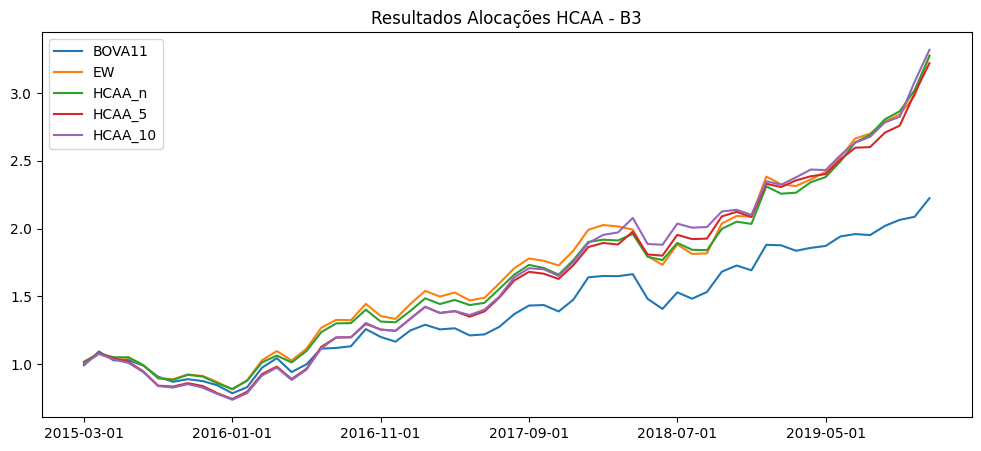

In [130]:
(1+hcaa_portfolios_results['2015':'2020']).cumprod().plot(figsize=(12,5), title="Resultados Alocações HCAA - B3");
f.summary_stats(hcaa_portfolios_results['2015':'2020'],rfr).sort_values('Sharpe Ratio', ascending=False)

## Portfólio de Contribuição de Risco Igual Hierárquico (HERC)